In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
%matplotlib inline
%reload_kedro
%load_ext nb_black

2022-04-03 23:25:24,135 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.


/opt/anaconda3/envs/transmilenio/lib/python3.8/site-packages/kedro/framework/context/context.py:32: DeprecationWarning: Accessing package_name via the context will be deprecated in Kedro 0.18.0.
  warn(


2022-04-03 23:25:24,207 - kedro.config.config - INFO - Config from path `/Users/juanazuero/Documents/Transporte/Transmilenio/transmi/conf/local` will override the following existing top-level config keys: dic_estacion_linea_int, dic_estacion_linea_raw, validaciones_troncal, validaciones_troncal_log_int, validaciones_troncal_log_raw, validaciones_troncal_summary@pandas, validaciones_troncal_zip_log_int, validaciones_troncal_zip_log_raw
2022-04-03 23:25:24,212 - root - INFO - ** Kedro project transmi
2022-04-03 23:25:24,212 - root - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`
2022-04-03 23:25:24,220 - root - INFO - Registered line magic `run_viz`
2022-04-03 23:25:24,251 - blib2to3.pgen2.driver - INFO - Generating grammar tables from /opt/anaconda3/envs/transmilenio/lib/python3.8/site-packages/blib2to3/Grammar.txt
2022-04-03 23:25:24,270 - blib2to3.pgen2.driver - INFO - Writing grammar tables to /Users/juanazuero/Library/Caches/black/20.8b1/Grammar3.8.0.

<IPython.core.display.Javascript object>

In [3]:
BASE_VALIDACIONES_REQUEST = "https://storage.googleapis.com/validaciones_tmsa/"

<IPython.core.display.Javascript object>

In [4]:
links_data_transmi = catalog.load("links_data_transmi")

2022-04-03 23:25:24,300 - kedro.io.data_catalog - INFO - Loading data from `links_data_transmi` (CSVDataSet)...


<IPython.core.display.Javascript object>

In [26]:
from itertools import product

<IPython.core.display.Javascript object>

In [30]:
sheet_names_list = [
    "Validaciones Consolidado",
    "VALIDACIONES CONSOLIDADO",
    "VALIDACIONES TULLAVE",
    "Validaciones Tullave",
]
result = None
for row in links_data_transmi.iterrows():
    link = row[1]["Link"]
    link_type = row[1]["Type"]
    link = link.replace(" ", "%20")
    if link_type == 1:
        print(link)
        xl = pd.ExcelFile(BASE_VALIDACIONES_REQUEST + "ValidacionTroncal/" + link)
        visible_sheets = [
            sh.title for sh in xl.book.worksheets if sh.sheet_state == "visible"
        ]
        sheet = visible_sheets[0]
        for sh in sheet_names_list:
            if sh in visible_sheets:
                sheet = sh
                break
        excel = xl.parse(sheet)
        for i, j in product(range(8), range(8)):
            if str(excel.iloc[i, j]).strip() == "Fase":
                start_coord = i, j
                break
        cols = excel.iloc[start_coord[0], start_coord[1] :].values
        cols = [
            c.date() if type(c) == datetime.datetime else str(c).strip() for c in cols
        ]
        excel = excel.iloc[start_coord[0] + 1 :, start_coord[1] :].copy()
        excel.columns = cols
        excel = excel[excel["Fase"] != "Total general"].copy()
        excel.drop(["Total general", "Fase"], axis=1, inplace=True)
        excel.dropna(how="all", inplace=True)
        excel.dropna(how="all", axis=1, inplace=True)
        excel_summary = (
            excel.drop(["Línea", "Acceso de Estación"], axis=1)
            .groupby(["Estación", "Intervalo"])
            .sum()
        )
        excel_summary = excel_summary.reset_index().melt(
            id_vars=["Estación", "Intervalo"], var_name="date", value_name="demand"
        )
        result = pd.concat([result, excel_summary], ignore_index=True)

2022/02%20TM%20Resumen%20de%20Validaciones%20Troncales%20al%2028%20Feb%202022%20Intervalo%2015%20Mint.xlsx
2022/01%20TM%20Resumen%20de%20Validaciones%20Troncales%20al%2031%20de%20Ene%202022%20Intervalo%2015%20Mint.xlsx
2021/12%20TM%20Resumen%20de%20Validaciones%20Troncales%20al%2031%20Dic%202021%20Intervalo%2015%20Mint.xlsx
2021/11%20TM%20Resumen%20de%20Validaciones%20Troncales%20al%2030%20Nov%202021%20Intervalo%2015%20Mint.xlsx
2021/10%20TM%20Resumen%20de%20Validaciones%20Troncales%20al%2031%20Oct%202021%20Intervalo%2015%20Mint.xlsx
2021/09%20TM%20Resumen%20de%20Validaciones%20Troncales%20al%2030%20Sep%202021%20Intervalo%2015%20Mint.xlsx
2021/08%20TM%20Resumen%20de%20Validaciones%20Troncales%20al%2031%20Ago%202021%20Intervalo%2015%20Mint.xlsx
2021/07%20TM%20Resumen%20de%20Validaciones%20Troncales%20al%2031%20Jul%202021%20Intervalo%2015%20Mint.xlsx
2021/06%20TM%20Resumen%20de%20Validaciones%20Troncales%20al%2030%20Jun%202021%20Intervalo%2015%20Mint.xlsx
2021/05%20TM%20Resumen%20de%20Va

<IPython.core.display.Javascript object>

In [32]:
links_data_transmi_2 = links_data_transmi[links_data_transmi["Type"] != 1]

<IPython.core.display.Javascript object>

In [33]:
link = links_data_transmi_2.iloc[0, 0]
link_type = links_data_transmi_2.iloc[0, 1]

<IPython.core.display.Javascript object>

In [34]:
link = link.replace(" ", "%20")

<IPython.core.display.Javascript object>

In [35]:
xl = pd.ExcelFile(BASE_VALIDACIONES_REQUEST + "ValidacionTroncal/" + link)
visible_sheets = [sh.title for sh in xl.book.worksheets if sh.sheet_state == "visible"]
sheet = visible_sheets[0]
for sh in sheet_names_list:
    if sh in visible_sheets:
        sheet = sh
        break
excel = xl.parse(sheet)

<IPython.core.display.Javascript object>

In [45]:
excel["Unnamed: 0"].value_counts().iloc[250:300]

(03) Acceso Peatonal Norte (Discapacidad)                                                             2
(11521) BD-046A00_|K11 - CL82                                                                         2
(1911) K062|Quinta Paredes B - 4                                                                      2
(1957) L032|Las Nieves B - 2                                                                          2
(1929) 131A06_EE|131A06_Banco de la Republica Central                                                 2
(1482) D013|Cra. 47 A - 3                                                                             2
(12412) 137A04|AC80 - K114                                                                            2
(12411) PA12411|AC80 - K112A                                                                          2
(11519) BD-044A00_|K11 - CL93                                                                         2
(1914) K065|Salitre - El Greco A - 3                            

<IPython.core.display.Javascript object>

In [36]:
excel.iloc[:10, :30]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,Reporte de Validaciones Consolidado Estaciones...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Periodo,"Del 01 al 31 de Mayo de 2,017",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fuente:,FCS CENTER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Etiquetas de fila,01/05/2017,02/05/2017,03/05/2017,04/05/2017,05/05/2017,06/05/2017,07/05/2017,08/05/2017,09/05/2017,...,20/05/2017,21/05/2017,22/05/2017,23/05/2017,24/05/2017,25/05/2017,26/05/2017,27/05/2017,28/05/2017,29/05/2017
6,(11) Zona K Calle 26,48983,179151,179979,183276,185554,116483,54542,176050,173695,...,95689,42373,163020,166898,165475,150694,164507,85874,38379,35024
7,(06000) Portal Eldorado,18905,62262,61885,61965,62500,41512,19758,59960,60991,...,40562,20106,60389,60723,60626,58686,59849,38430,18478,17864
8,(01) Acceso Alimentación Sur,5180,19009,18815,18790,19107,13119,5748,17722,16413,...,13092,5863,18172,17637,18739,17867,18090,12546,5496,5093
9,04:00,NaN,NaN,1,2,3,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,1,1,2,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [37]:
excel.iloc[:, 1].unique()

array(['Reporte Validaciones por Intervalo Estaciones Transmilenio - Tarjeta Tullave',
       nan, 'Periodo', 'Fuente:', 'Etiquetas de fila',
       '(11) Zona K Calle 26', '(06000) Portal Eldorado',
       '(01) Acceso Alimentación Sur', '04:00', '04:15', '04:30', '04:45',
       '05:00', '05:15', '05:30', '05:45', '06:00', '06:15', '06:30',
       '06:45', '07:00', '07:15', '07:30', '07:45', '08:00', '08:15',
       '08:30', '08:45', '09:00', '09:15', '09:30', '09:45', '10:00',
       '10:15', '10:30', '10:45', '11:00', '11:15', '11:30', '11:45',
       '12:00', '12:15', '12:30', '12:45', '13:00', '13:15', '13:30',
       '13:45', '14:00', '14:15', '14:30', '14:45', '15:00', '15:15',
       '15:30', '15:45', '16:00', '16:15', '16:30', '16:45', '17:00',
       '17:15', '17:30', '17:45', '18:00', '18:15', '18:30', '18:45',
       '19:00', '19:15', '19:30', '19:45', '20:00', '20:15', '20:30',
       '20:45', '21:00', '21:15', '21:30', '21:45', '22:00', '22:15',
       '22:30', '22:45', 

<IPython.core.display.Javascript object>

In [39]:
BASE_VALIDACIONES_REQUEST + link

'https://storage.googleapis.com/validaciones_tmsa/2017/TM%20Resumen%20de%20Validaciones%2001%20al%2031%20Mayo-2017%20cada%2015%20minutos.xlsx'

<IPython.core.display.Javascript object>

In [17]:
for i in range(8):
    for j in range(5):
        if str(excel.iloc[i, j]).strip() == "Fase":
            start_coord = i, j
            break

<IPython.core.display.Javascript object>

In [18]:
cols = excel.iloc[start_coord[0], start_coord[1] :].values
cols = [c.date() if type(c) == datetime.datetime else c.strip() for c in cols]
excel = excel.iloc[start_coord[0] + 1 :, start_coord[1] :].copy()
excel.columns = cols
excel = excel[excel["Fase"] != "Total general"].copy()
excel.drop(["Total general", "Fase"], axis=1, inplace=True)
excel.dropna(how="all", inplace=True)
excel.dropna(how="all", axis=1, inplace=True)
excel_summary = (
    excel.drop(["Línea", "Acceso de Estación"], axis=1)
    .groupby(["Estación", "Intervalo"])
    .sum()
)
excel_summary = excel_summary.reset_index().melt(
    id_vars=["Estación", "Intervalo"], var_name="date", value_name="demand"
)

<IPython.core.display.Javascript object>

In [19]:
excel_summary

,Estación,Intervalo,date,demand
0,(02000) Cabecera Autopista Norte,00:00,2017-10-01,0
1,(02000) Cabecera Autopista Norte,00:15,2017-10-01,0
2,(02000) Cabecera Autopista Norte,03:30,2017-10-01,0
3,(02000) Cabecera Autopista Norte,03:45,2017-10-01,0
4,(02000) Cabecera Autopista Norte,04:00,2017-10-01,0
...,...,...,...,...
416728,(896) L82 Refuerzo CL 79,20:00,2017-10-31,0
416729,(896) L82 Refuerzo CL 79,20:15,2017-10-31,0
416730,(896) L82 Refuerzo CL 79,20:30,2017-10-31,0
416731,(896) L82 Refuerzo CL 79,20:45,2017-10-31,5


<IPython.core.display.Javascript object>

In [13]:
excel.iloc[:10, :10]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,Reporte Validaciones por Intervalo Estaciones ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Periodo Validaciones:,NaN,01 Al 31 Octubre 2017,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Fuente:,NaN,FCS Center,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Fase,Línea,Estación,Acceso de Estación,Intervalo,2017-10-01 00:00:00,2017-10-02 00:00:00,2017-10-03 00:00:00,2017-10-04 00:00:00
6,NaN,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) Acceso Alimentación Sur,04:00,0,2,0,1
7,NaN,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) Acceso Alimentación Sur,04:15,0,5,8,8
8,NaN,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) Acceso Alimentación Sur,04:30,0,18,30,14
9,NaN,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) Acceso Alimentación Sur,04:45,1,99,94,97


<IPython.core.display.Javascript object>

In [17]:
result.dtypes

Estación     object
Intervalo    object
date         object
demand        int64
dtype: object

<IPython.core.display.Javascript object>

In [10]:
result["Intervalo"].unique()

array([datetime.time(0, 0), datetime.time(0, 15), datetime.time(4, 0),
       datetime.time(4, 15), datetime.time(4, 30), datetime.time(4, 45),
       datetime.time(5, 0), datetime.time(5, 15), datetime.time(5, 30),
       datetime.time(5, 45), datetime.time(6, 0), datetime.time(6, 15),
       datetime.time(6, 30), datetime.time(6, 45), datetime.time(7, 0),
       datetime.time(7, 15), datetime.time(7, 30), datetime.time(7, 45),
       datetime.time(8, 0), datetime.time(8, 15), datetime.time(8, 30),
       datetime.time(8, 45), datetime.time(9, 0), datetime.time(9, 15),
       datetime.time(9, 30), datetime.time(9, 45), datetime.time(10, 0),
       datetime.time(10, 15), datetime.time(10, 30),
       datetime.time(10, 45), datetime.time(11, 0), datetime.time(11, 15),
       datetime.time(11, 30), datetime.time(11, 45), datetime.time(12, 0),
       datetime.time(12, 15), datetime.time(12, 30),
       datetime.time(12, 45), datetime.time(13, 0), datetime.time(13, 15),
       datetime.tim

<IPython.core.display.Javascript object>

In [26]:
excel

,Etiquetas de fila,01/05/2017,02/05/2017,03/05/2017,04/05/2017,05/05/2017,06/05/2017,07/05/2017,08/05/2017,09/05/2017,...,23/05/2017,24/05/2017,25/05/2017,26/05/2017,27/05/2017,28/05/2017,29/05/2017,30/05/2017,31/05/2017,Total general
6,(11) Zona K Calle 26,37714,140871,141670,144464,146227,90701,42044,138663,137253,...,132526,131429,119882,130711,67940,30260,27604,129395,126019,3355528
7,(06000) Portal Eldorado,14770,49937,49684,49786,50044,32973,15660,48089,49041,...,49131,48883,47479,48289,30776,14669,14089,48058,47178,1245920
8,(01) Acceso Alimentación Sur,4067,15317,15255,15236,15357,10460,4580,14319,13241,...,14352,15217,14527,14687,10058,4354,4055,14707,14233,380119
9,04:00,NaN,NaN,1,2,3,NaN,NaN,NaN,1,...,NaN,1,1,1,NaN,NaN,NaN,2,NaN,19
10,04:15,NaN,5,4,5,5,NaN,NaN,5,4,...,15,11,10,7,NaN,NaN,NaN,15,4,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54070,20:30,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
54071,(1986) L061|San Diego B - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77
54072,07:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54
54073,08:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23


<IPython.core.display.Javascript object>

22/03/31 17:04:12 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 937897 ms exceeds timeout 120000 ms
22/03/31 17:04:12 WARN SparkContext: Killing executors is not supported by current scheduler.


In [15]:
excel["Fase "]

6               Fase 3
7               Fase 3
8               Fase 3
9               Fase 3
10              Fase 3
             ...      
64956              NaN
64957              NaN
64958              NaN
64959              NaN
64960    Total general
Name: Fase , Length: 64955, dtype: object

<IPython.core.display.Javascript object>

In [73]:
link

'2012/08%20AGO%2012_VALIDACIONES%20TRONCALES.xlsx'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
for i in range(8):
    for j in range(5):
        if excel_type_1.iloc[i, j] == "Fase":
            start_coord = i, j
            break

<IPython.core.display.Javascript object>

In [25]:
cols = excel_type_1.iloc[start_coord[0], start_coord[1] :].values

<IPython.core.display.Javascript object>

In [34]:
cols = [c.date() if type(c) == datetime.datetime else c for c in cols]

<IPython.core.display.Javascript object>

In [28]:
excel_type_1 = excel_type_1.iloc[start_coord[0] + 1 :, start_coord[1] :].copy()

<IPython.core.display.Javascript object>

In [35]:
excel_type_1.columns = cols

<IPython.core.display.Javascript object>

In [42]:
excel_type_1.drop("Total general",'Fase', axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [44]:
excel_type_1 = excel_type_1[excel_type_1["Fase"] != "Total general"].copy()

<IPython.core.display.Javascript object>

In [46]:
excel_type_1.dropna(how="all", inplace=True)
excel_type_1.dropna(how="all", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [54]:
excel_type_1_summary = (
    excel_type_1.drop(["Fase", "Línea", "Acceso de Estación"], axis=1)
    .groupby(["Estación", "Intervalo"])
    .sum()
)

<IPython.core.display.Javascript object>

In [57]:
excel_type_1_summary = excel_type_1_summary.reset_index().melt(
    id_vars=["Estación", "Intervalo"], var_name="date", value_name="demand"
)

<IPython.core.display.Javascript object>

In [58]:
excel_type_1_summary

,Estación,Intervalo,date,demand
0,(02000) Cabecera Autopista Norte,00:00:00,2022-02-01,0
1,(02000) Cabecera Autopista Norte,00:15:00,2022-02-01,0
2,(02000) Cabecera Autopista Norte,04:00:00,2022-02-01,1
3,(02000) Cabecera Autopista Norte,04:15:00,2022-02-01,45
4,(02000) Cabecera Autopista Norte,04:30:00,2022-02-01,120
...,...,...,...,...
373879,(57503) Ampliacion San Mateo,22:15:00,2022-02-28,3
373880,(57503) Ampliacion San Mateo,22:30:00,2022-02-28,0
373881,(57503) Ampliacion San Mateo,22:45:00,2022-02-28,1
373882,(57503) Ampliacion San Mateo,23:00:00,2022-02-28,0


<IPython.core.display.Javascript object>

In [51]:
excel_type_1.pivot(index)

,Fase,Línea,Estación,Acceso de Estación,Intervalo,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05,...,2022-02-19,2022-02-20,2022-02-21,2022-02-22,2022-02-23,2022-02-24,2022-02-25,2022-02-26,2022-02-27,2022-02-28
6,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,00:00:00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,03:45:00,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,04:00:00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,04:15:00,27,35,27,17,17,...,15,4,20,29,39,17,21,13,2,21
10,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,04:30:00,49,40,63,45,43,...,44,9,44,57,39,67,48,24,12,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43136,Fase 3,(40) Zona T Ciudad Bolívar,(40003) Mirador del Paraiso,(01) Acceso Peatonal,21:00:00,4,10,9,7,17,...,15,4,10,11,10,10,9,31,12,9
43137,Fase 3,(40) Zona T Ciudad Bolívar,(40003) Mirador del Paraiso,(01) Acceso Peatonal,21:15:00,5,7,5,11,24,...,17,0,6,7,12,22,6,17,0,3
43138,Fase 3,(40) Zona T Ciudad Bolívar,(40003) Mirador del Paraiso,(01) Acceso Peatonal,21:30:00,3,2,1,5,20,...,11,0,1,9,3,1,6,14,0,10
43139,Fase 3,(40) Zona T Ciudad Bolívar,(40003) Mirador del Paraiso,(01) Acceso Peatonal,21:45:00,2,3,1,2,20,...,18,0,3,0,7,1,7,3,0,1


<IPython.core.display.Javascript object>

In [50]:
excel_type_1["Intervalo"].iloc[0]

datetime.time(0, 0)

<IPython.core.display.Javascript object>

<AxesSubplot:>

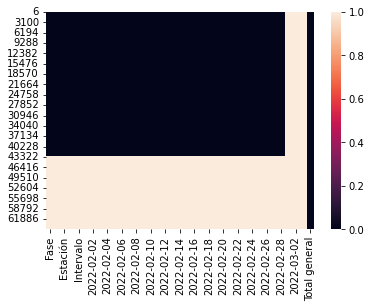

<IPython.core.display.Javascript object>

In [38]:
sns.heatmap(excel_type_1.isna())

In [8]:
pd.read_excel(
    BASE_VALIDACIONES_REQUEST
    + "2022/02 TM Resumen de Validaciones Troncales al 28 Feb 2022 Intervalo 15 Mint.xlsx"
)

InvalidURL: URL can't contain control characters. '/validaciones_tmsa/2022/02 TM Resumen de Validaciones Troncales al 28 Feb 2022 Intervalo 15 Mint.xlsx' (found at least ' ')

<IPython.core.display.Javascript object>

In [ ]:

http_response = urlopen(url)
zipfile = ZipFile(BytesIO(http_response.read()))
zipfile.extractall(path=extract_to)

In [ ]:

def download_and_unzip(url, extract_to='.'):